# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2023/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://github.com/suneman/socialdata2023/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

## Overview

Today's lecture does a few things.
* First there is an introduction to data visualization incl a little exercise and a video (Part 1). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots (Part 2,4,5).
* We will also talk a bit about what makes a good plot (Part 3).

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

Now, to the exercise:

> *Exercise*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

In [1]:
import numpy as np
import pandas as pd
root = "/Users/jenspt/Desktop/git/socialdata2023/files/"

dfs = []

for i in range(1,5):
    dfs.append(pd.read_csv(root +f"data{i}.tsv", sep="\t", header=None, names=["X","Y"]))

In [41]:
#calculate mean and variance for four df
from scipy import stats

for i,df in enumerate(dfs):
    print(f"File {i+1}")
    print("\tMean of X: {:.2f}".format(np.mean(df.X)))
    print("\tMean of Y: {:.2f}".format(np.mean(df.Y)))
    print("\tVariance of X: {:.3f}".format(np.var(df.X)))
    print("\tVariance of Y: {:.3f}".format(np.var(df.Y)))
    print("\tPearson correlation between X and Y: {:.3f}".format(np.corrcoef(df.X, df.Y)[0,1]))
    slope, intercept, r_value, p_value, std_error = stats.linregress(df.X, df.Y)
    print("\tThe linear regression can be denoted as: y= {:.2f}x + {:.2f}".format(slope,intercept))

File 1
	Mean of X: 9.00
	Mean of Y: 7.50
	Variance of X: 10.000
	Variance of Y: 3.752
	Pearson correlation between X and Y: 0.816
	The linear regression can be denoted as: y= 0.50x + 3.00
File 2
	Mean of X: 9.00
	Mean of Y: 7.50
	Variance of X: 10.000
	Variance of Y: 3.752
	Pearson correlation between X and Y: 0.816
	The linear regression can be denoted as: y= 0.50x + 3.00
File 3
	Mean of X: 9.00
	Mean of Y: 7.50
	Variance of X: 10.000
	Variance of Y: 3.748
	Pearson correlation between X and Y: 0.816
	The linear regression can be denoted as: y= 0.50x + 3.00
File 4
	Mean of X: 9.00
	Mean of Y: 7.50
	Variance of X: 10.000
	Variance of Y: 3.748
	Pearson correlation between X and Y: 0.817
	The linear regression can be denoted as: y= 0.50x + 3.00


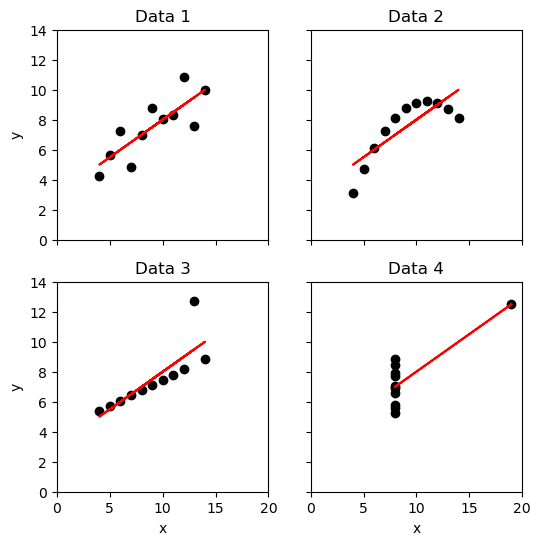

In [53]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)
#fig.tight_layout()

for i, df in enumerate(dfs):
    ax = axes[int(np.floor(i/2)),i%2]
    ax.scatter(df.X, df.Y, color="black")
    slope, intercept, r_value, p_value, std_error = stats.linregress(df.X, df.Y)
    ax.plot(df.X, slope*df.X+intercept, color="red")
    ax.set_title(f"Data {i+1}")
    ax.set_xlim(0,20)
    ax.set_ylim(0,14)
    if i == 0 or i ==2:
        ax.set_ylabel("y")
    if i >= 2:
        ax.set_xlabel("x")

**Q**: Eventhough the data is fundamentally different the summary statistics all give the same results, which means that plotting is super important!

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9D2aI30AMhM/0.jpg)](https://www.youtube.com/watch?v=9D2aI30AMhM)

> *Excercise:* Questions for the lecture
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis. 

## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [33]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [2]:
df = pd.read_csv("/Users/jenspt/Desktop/git/socialdata2023/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

df["Timestamp"] = pd.to_datetime(df["Date"]+df["Time"], format="%m/%d/%Y%H:%M")
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df[df["Timestamp"] < "12/31/2017"]
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Timestamp
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-11-22 17:50:00
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-10-18 20:00:00
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-15 02:00:00
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0,2011-02-18 05:27:00
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2010-11-21 17:00:00


In [4]:
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['dow'] = df['Timestamp'].dt.dayofweek
df['hour'] = df['Timestamp'].dt.hour
df['how'] = df['Timestamp'].dt.dayofweek * 24 + (df['Timestamp'].dt.hour + 1)

df[['Timestamp','year','month','dow','hour','how']].head()

,Timestamp,year,month,dow,hour,how
0,2004-11-22 17:50:00,2004,11,0,17,18
1,2005-10-18 20:00:00,2005,10,1,20,45
2,2004-02-15 02:00:00,2004,2,6,2,147
3,2011-02-18 05:27:00,2011,2,4,5,102
4,2010-11-21 17:00:00,2010,11,6,17,162


In [63]:
resolutions = ['month', 'dow','hour','how']

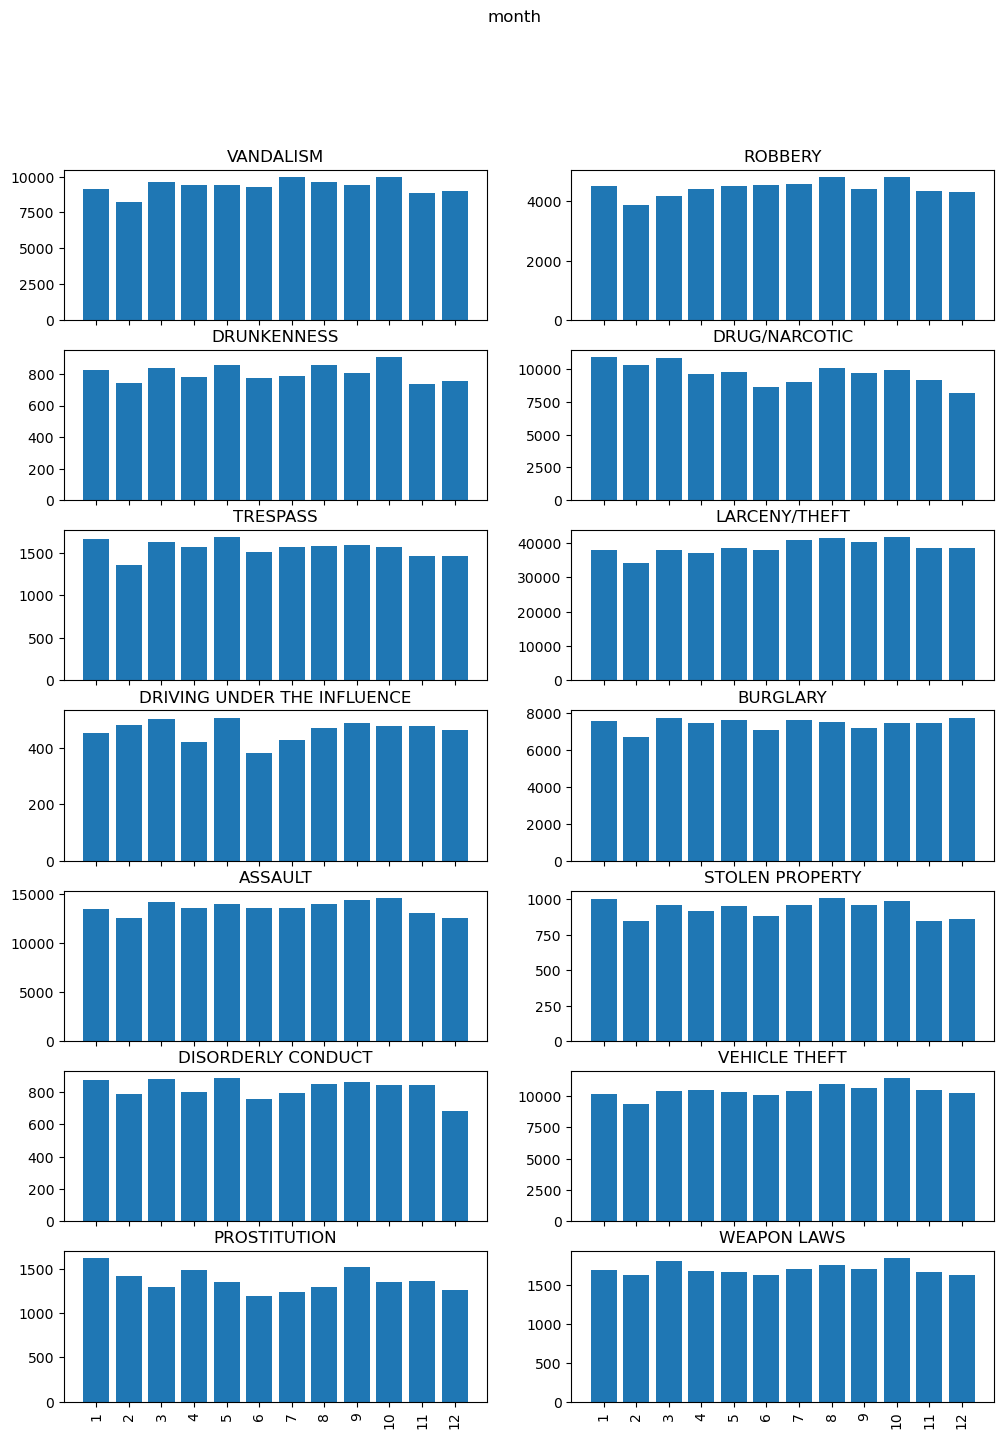

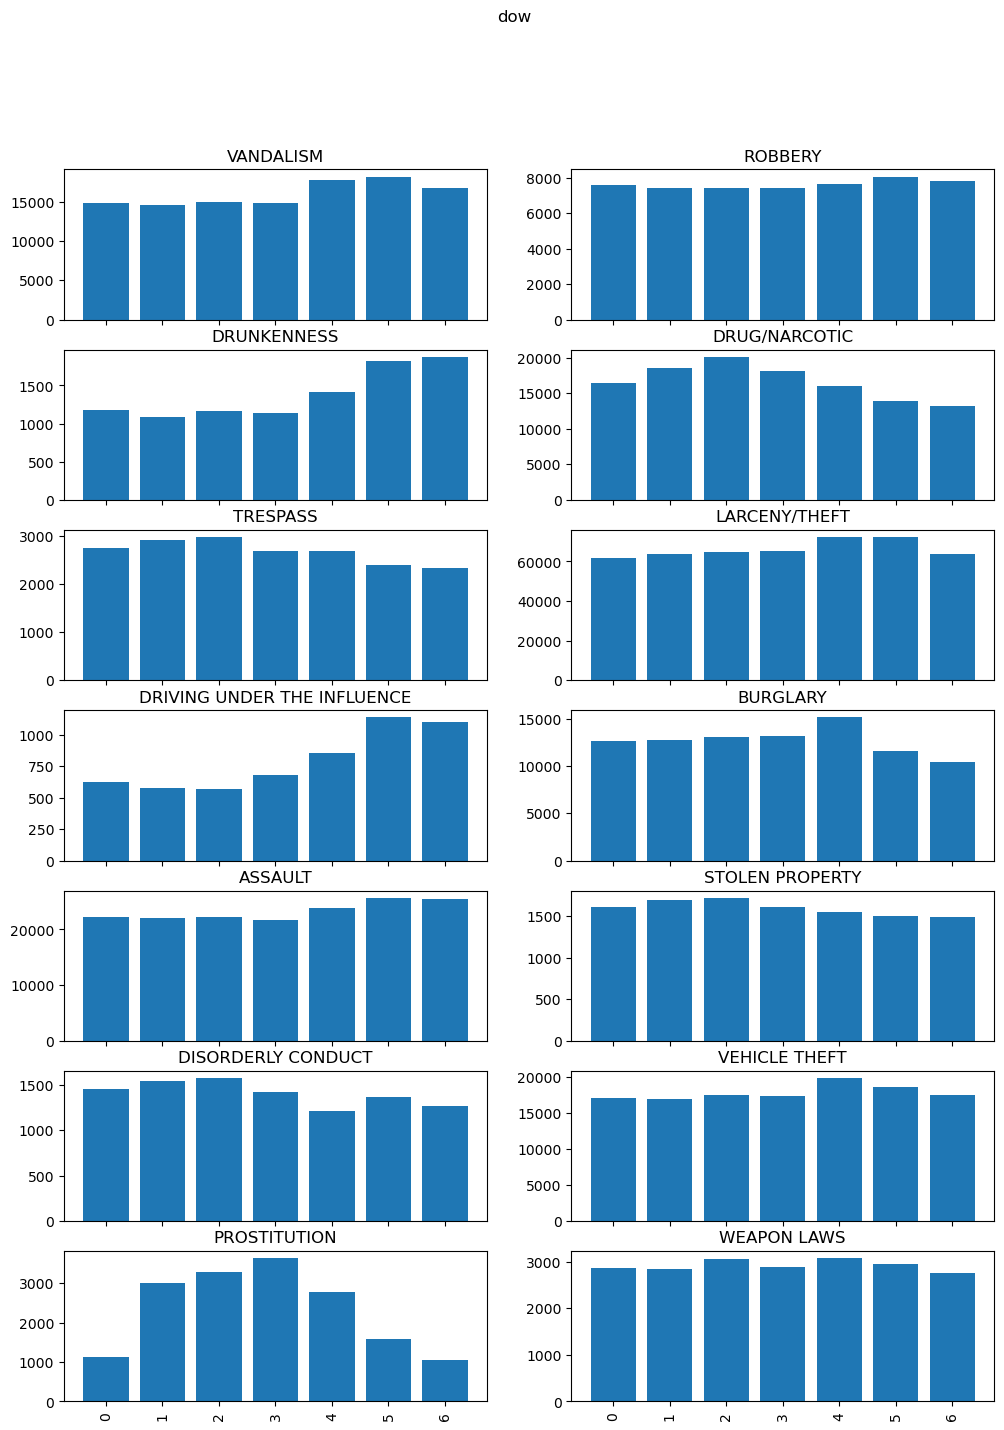

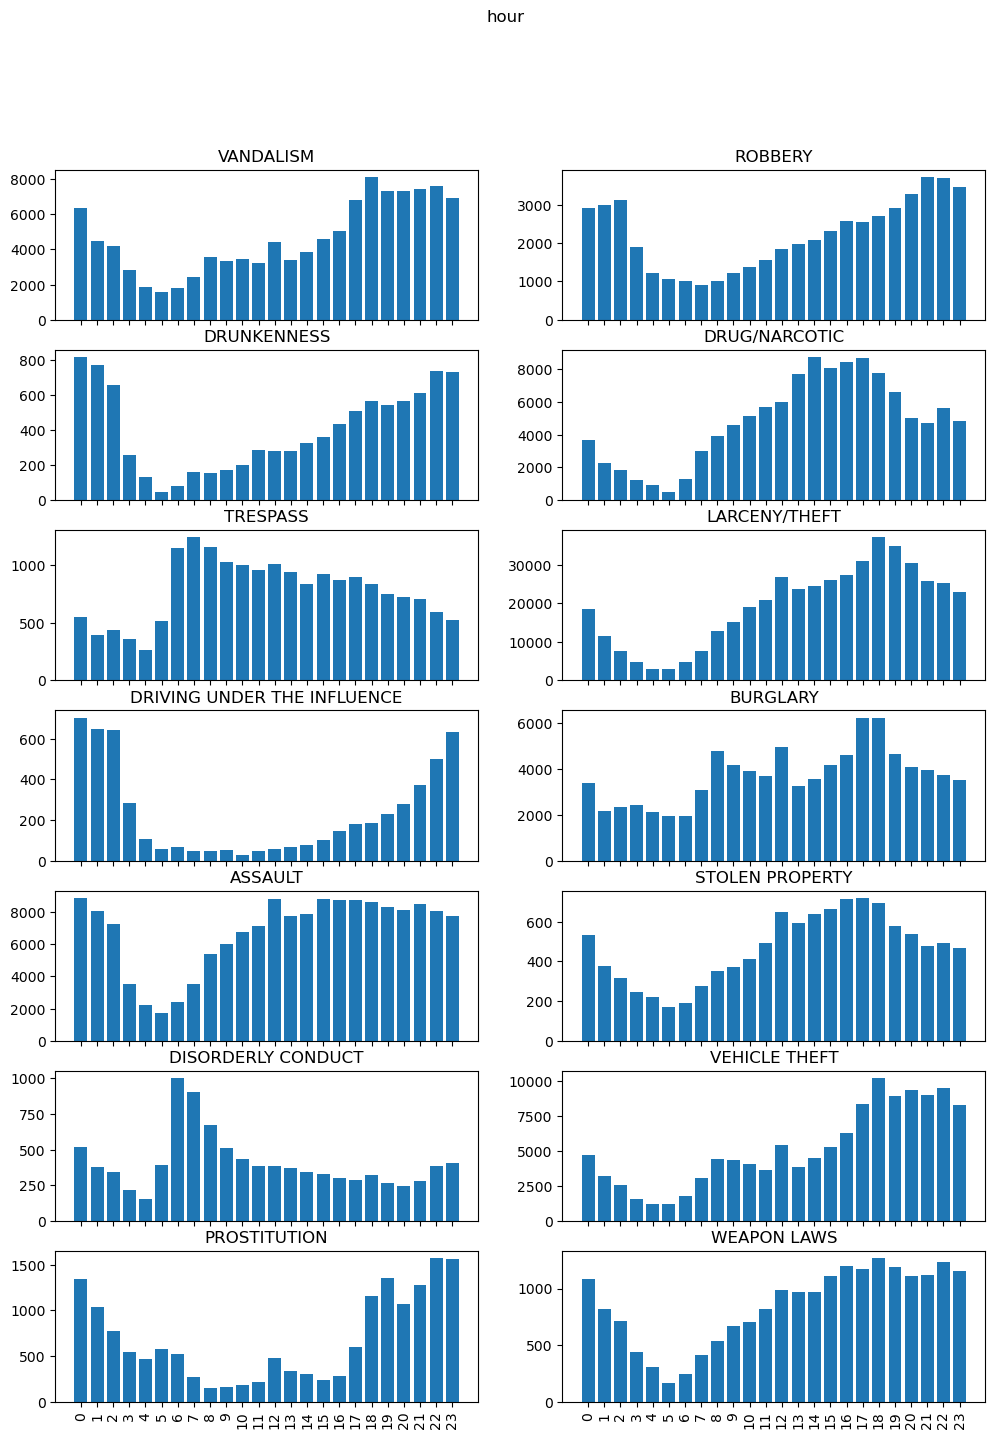

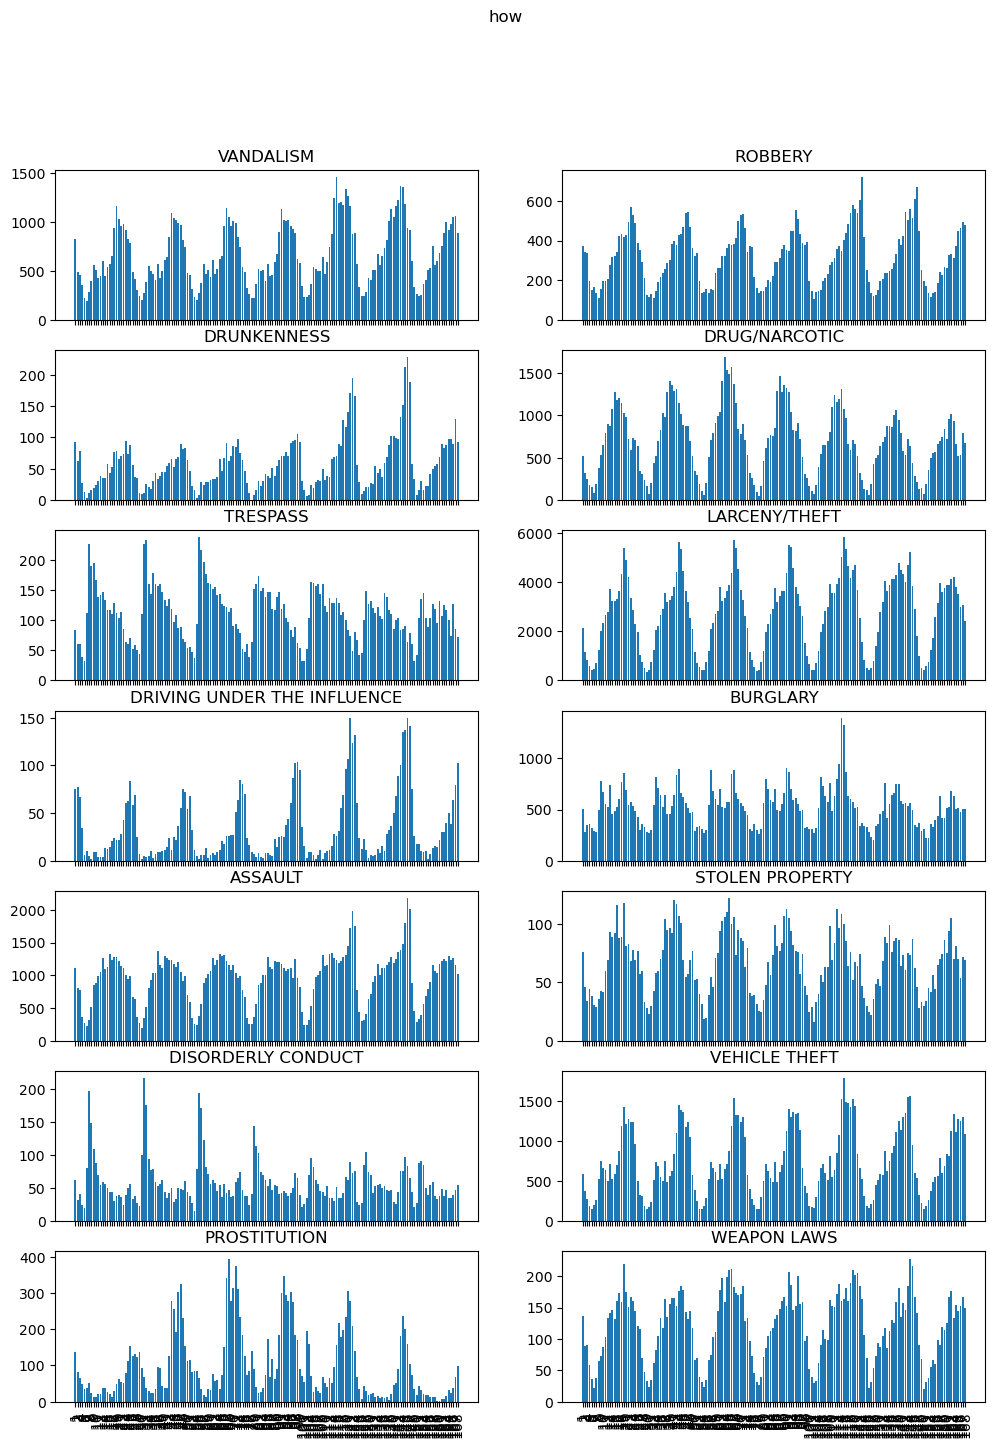

In [66]:
for res in resolutions:
    #taken from Week 1
    grouped = df.groupby(['Category', res]).size().reset_index(name='counts')
    pivot = grouped.pivot(index=res, columns='Category', values='counts')
    plt.rcParams["figure.figsize"] = (12,16)

    fig, axes = plt.subplots(7,2,sharex=True)
    #fig.tight_layout()
    fig.suptitle(res)
    index = list(pivot.index)  #years is
    x_pos = np.arange(len(index))

    for i, c in enumerate(focuscrimes):
        ax = axes[int(np.floor(i/2)),i%2]
        ax.bar(x_pos, pivot[c])
        ax.set_xticks(x_pos)
        ax.set_title(c)
        ax.set_xticklabels(index, rotation=90)
    plt.show()

Too much plotted I would say...

**Fun little thing**: To further make the point of the exercise in Part 1, check out this video on youtube https://www.youtube.com/watch?v=DbJyPELmhJc  

# Part 3: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below


[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9hIu4pgJXQc/0.jpg)](https://www.youtube.com/watch?v=9hIu4pgJXQc)

> *Exercise:* Nice plots
> * Create a list of 10 rules for nice plots based on the video.

**RULES FOR PLOTTING**

1) Subplots is good to avoid too many plots. Avoid scrolling too much. Good as long as plots are comparable.
2) Matplotlib defaults to creating subplots with a lot of space in between them. We prefer tight_layout
3) Labels!!! Legend!! Nice axis limits and ticks! Zoom level (axis limits again)
4) Zoom levels in subplots should be the same or at least comparable.
5) Keep it simple, use the ink you need and nothing more. Show the data, maximize the data-ink ratio, erase non-data ink, erase redundant data-ink, revise and edit.
6) Show you put an effort. Change the font from DejaVu-Sans to albetica.
7) Captions! Start with headline; then subplots; careful describe what happens in A and then B. End with main take-away messages/conclusions.


# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise (extra hard):* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).
> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`

**Note**: I added this exercise with fewer hints than usual to give you a bit of an extra challenge. Once you're done, you'll agree that it is not difficult to create these plots. What ***IS*** difficult is figuring out all the little steps you need to do to make them work. 

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. So this time I'm trying to do that by posing a slightly more high-level set of problems than usual. 

*My approach is always to think*: Even if my task seems impossible, I think is there any problem that I ***CAN*** solve that will get me closer to where I want to go. Once I've solved that part, I'm smarter and I try to think: Is there a new problem I can solve that'll get me closer knowing what I know now. And I just keep going. Usually that's enough.

*If that seems too abstract*, a useful goal for you is to use your internet searching skills to figure out how to make each visualization work -- look for examples, tutorials, stack overflow posts, people who have found the same error messages as you, etc, etc.

In [10]:
grouped = df.groupby(['Category','Date']).size().reset_index(name='counts')
pivot = grouped.pivot(index='Date', columns='Category', values='counts')
pivot.head()

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1.0,80.0,2.0,NaN,14.0,3.0,2.0,29.0,6.0,7.0,...,NaN,1.0,NaN,35.0,NaN,4.0,28.0,31.0,31.0,3.0
2003-01-02,NaN,27.0,NaN,2.0,12.0,1.0,1.0,33.0,1.0,NaN,...,NaN,3.0,NaN,10.0,NaN,4.0,19.0,46.0,23.0,4.0
2003-01-03,NaN,30.0,NaN,NaN,28.0,5.0,NaN,26.0,1.0,1.0,...,NaN,2.0,NaN,11.0,NaN,6.0,18.0,21.0,31.0,5.0
2003-01-04,NaN,29.0,NaN,NaN,15.0,2.0,1.0,31.0,NaN,NaN,...,NaN,3.0,1.0,9.0,NaN,4.0,9.0,46.0,18.0,NaN
2003-01-05,2.0,38.0,NaN,NaN,7.0,2.0,4.0,31.0,3.0,NaN,...,NaN,3.0,NaN,11.0,NaN,1.0,24.0,48.0,27.0,8.0


(<Figure size 1000x2550 with 15 Axes>,
 array([<AxesSubplot: ylabel='2003'>, <AxesSubplot: ylabel='2004'>,
        <AxesSubplot: ylabel='2005'>, <AxesSubplot: ylabel='2006'>,
        <AxesSubplot: ylabel='2007'>, <AxesSubplot: ylabel='2008'>,
        <AxesSubplot: ylabel='2009'>, <AxesSubplot: ylabel='2010'>,
        <AxesSubplot: ylabel='2011'>, <AxesSubplot: ylabel='2012'>,
        <AxesSubplot: ylabel='2013'>, <AxesSubplot: ylabel='2014'>,
        <AxesSubplot: ylabel='2015'>, <AxesSubplot: ylabel='2016'>,
        <AxesSubplot: ylabel='2017'>], dtype=object))

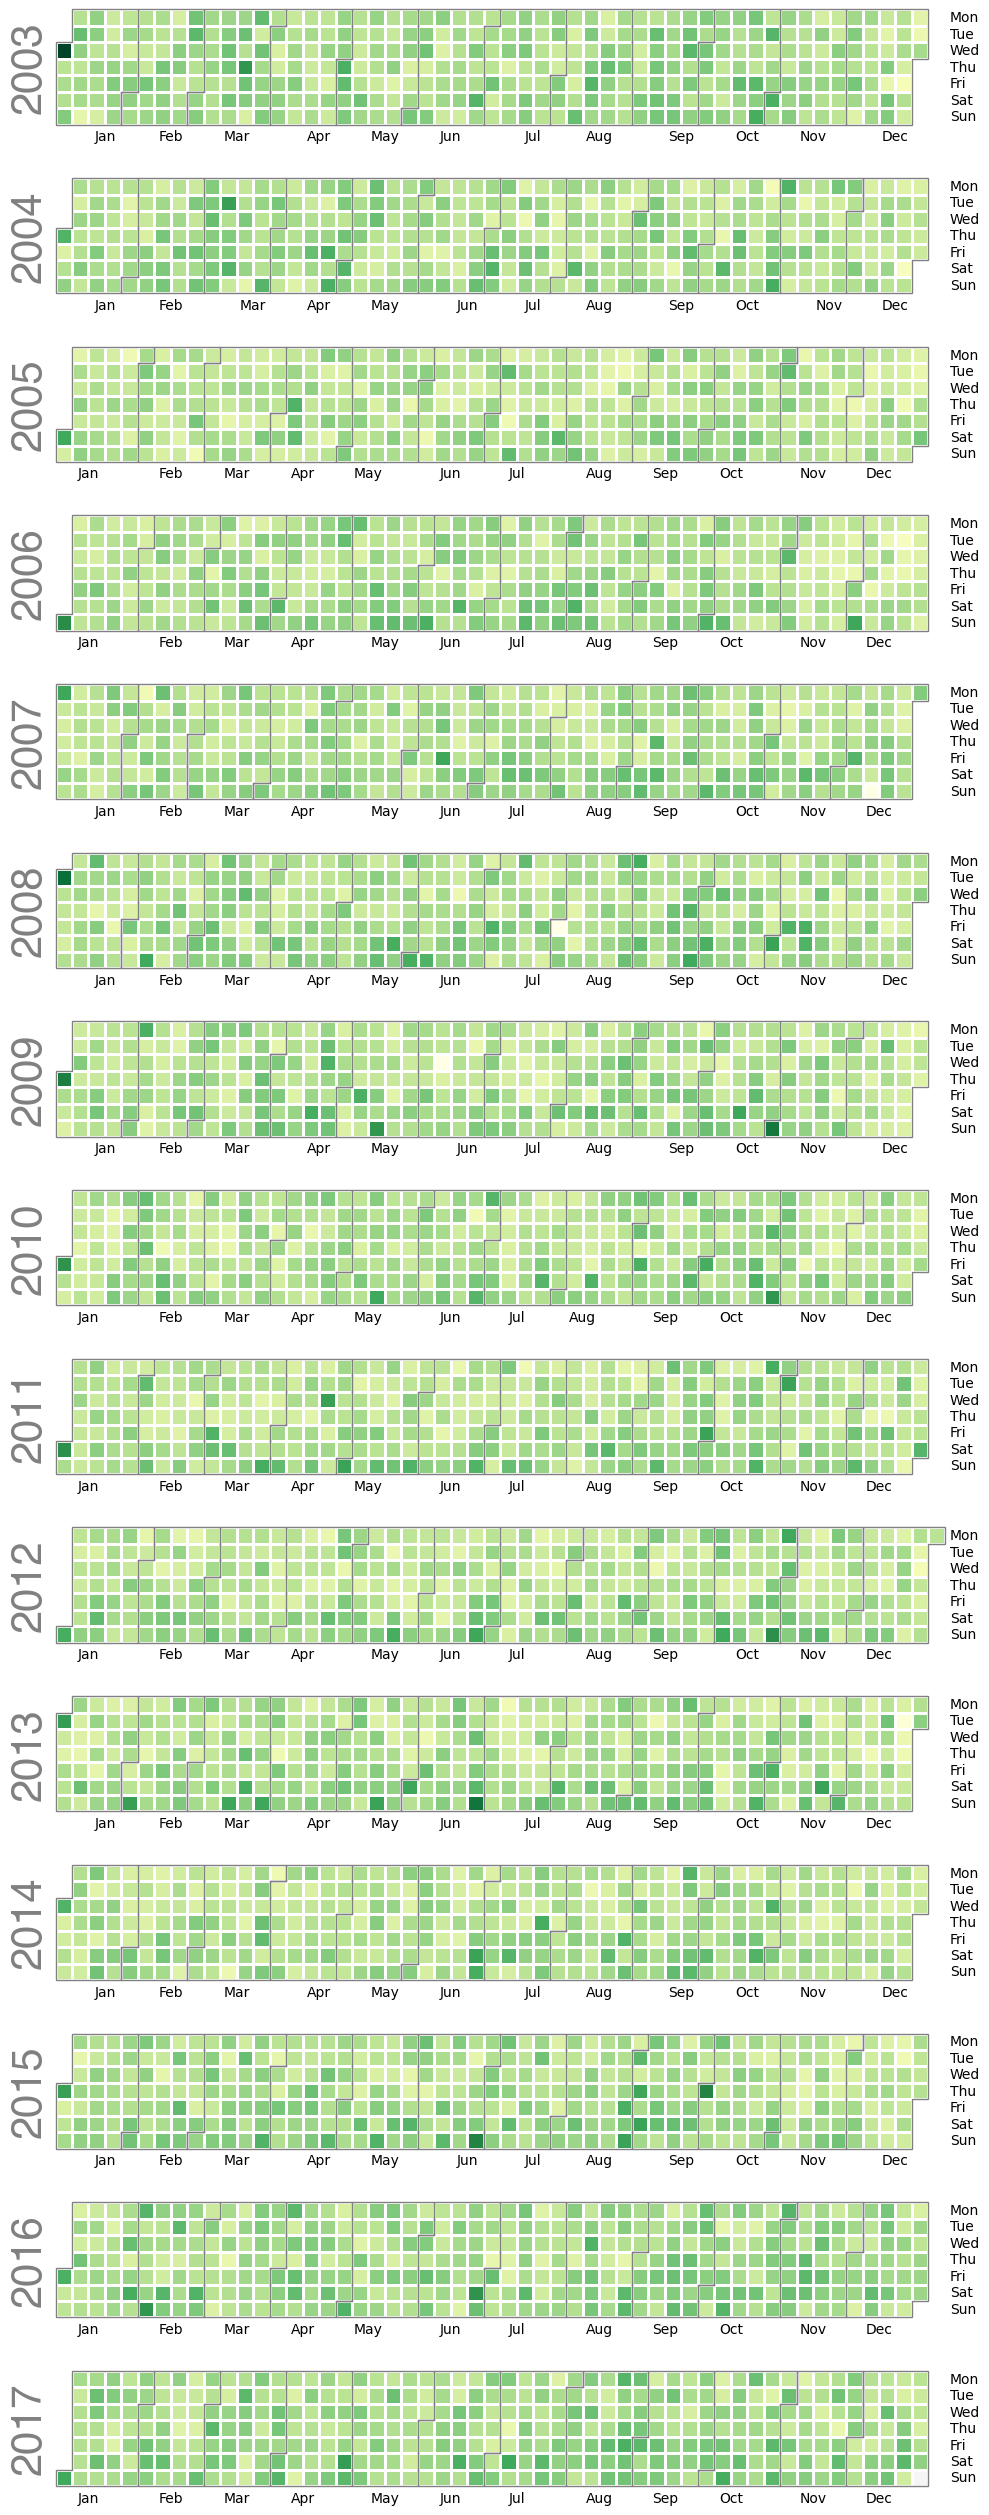

In [11]:
#calplot
import calplot
calplot.calplot(pivot['ASSAULT'],cmap='YlGn',colorbar=False)

<AxesSubplot: xlabel='Date'>

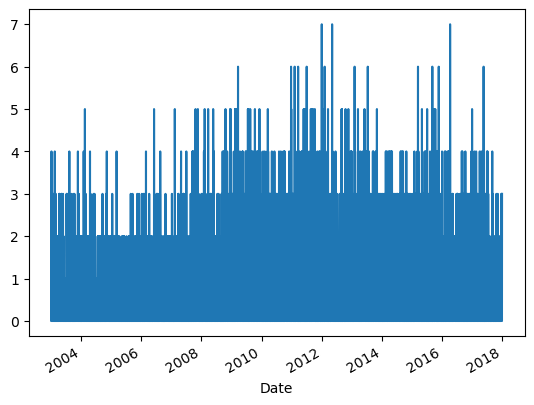

In [22]:
#time series data
import plotly.express as px
pivot["DRIVING UNDER THE INFLUENCE"].fillna(0).plot.line()

#cant be bothered...

In [5]:
#polar bar chart
grouped = df.groupby(['Category','hour']).size().reset_index(name='counts')
pivot = grouped.pivot(index='hour', columns='Category', values='counts')
pivot.head()


Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
hour,,,,,,,,,,,,,,,,,,,,,
0,249.0,8878.0,160.0,42.0,3386.0,517.0,705.0,3686.0,817.0,636.0,...,9.0,534.0,46.0,5006.0,NaN,550.0,6352.0,4694.0,3958.0,1087.0
1,237.0,8072.0,3.0,26.0,2186.0,380.0,647.0,2242.0,774.0,12.0,...,NaN,379.0,43.0,2147.0,NaN,393.0,4451.0,3204.0,2696.0,815.0
2,259.0,7258.0,2.0,27.0,2357.0,341.0,642.0,1817.0,656.0,8.0,...,NaN,317.0,30.0,1957.0,2.0,436.0,4209.0,2541.0,2245.0,712.0
3,255.0,3557.0,3.0,20.0,2412.0,216.0,286.0,1235.0,258.0,13.0,...,NaN,246.0,23.0,1366.0,NaN,359.0,2819.0,1572.0,1739.0,439.0
4,215.0,2214.0,3.0,10.0,2140.0,158.0,106.0,900.0,132.0,13.0,...,NaN,222.0,15.0,931.0,NaN,260.0,1879.0,1215.0,1325.0,308.0


In [6]:
vals = pivot["BRIBERY"].values
labels = pivot["BRIBERY"].index

In [9]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'iframe_connected'
num_slices = len(vals)
theta = [(i + 1.5) * 360 / num_slices for i in range(num_slices)]
width = [360 / num_slices for _ in range(num_slices)]


fig = go.Figure(go.Barpolar(
    r=vals,
    theta=theta,
    width=width,
    #marker_color=colors,
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))


fig.show()

#picture not rendered in this notebook, see figure_8.html file.

# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome data science (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? 

In [25]:
#polive districts.
df.PdDistrict.unique()

array(['INGLESIDE', 'PARK', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN',
       'BAYVIEW', 'CENTRAL', 'NORTHERN', 'MISSION', 'RICHMOND', nan],
      dtype=object)

In [27]:
df.PdDistrict.value_counts() # ofcourse it is southern - southside!

SOUTHERN      382173
MISSION       282605
NORTHERN      260274
CENTRAL       215835
BAYVIEW       201580
TENDERLOIN    184126
INGLESIDE     177549
TARAVAL       152211
PARK          117334
RICHMOND      110365
Name: PdDistrict, dtype: int64

In [37]:
#focus crimes
df[df.Category.isin(list(focuscrimes))].PdDistrict.value_counts()

SOUTHERN      221449
NORTHERN      167942
MISSION       159030
CENTRAL       135811
BAYVIEW       109582
TENDERLOIN    103356
INGLESIDE      99383
TARAVAL        86279
PARK           66381
RICHMOND       65277
Name: PdDistrict, dtype: int64

In [103]:
#time to rumble!
#df containing focus crimes.
df_focus = df[df.Category.isin(list(focuscrimes))]
p_crime = df_focus.Category.value_counts()/sum(df_focus.Category.value_counts())
p_crime = p_crime.sort_index() # to assure that index (order of categories is same as p_crime_pd)

In [64]:
t = df_focus.groupby(["PdDistrict",'Category']).size().reset_index(name="counts")

In [92]:
p_crime_pd = {}
for d in t.PdDistrict.unique():
    t_ = t[t.PdDistrict == d].copy()
    t_["p"] = t_["counts"]/t_["counts"].sum()
    p_crime_pd[d] = t_[["Category",'p']]


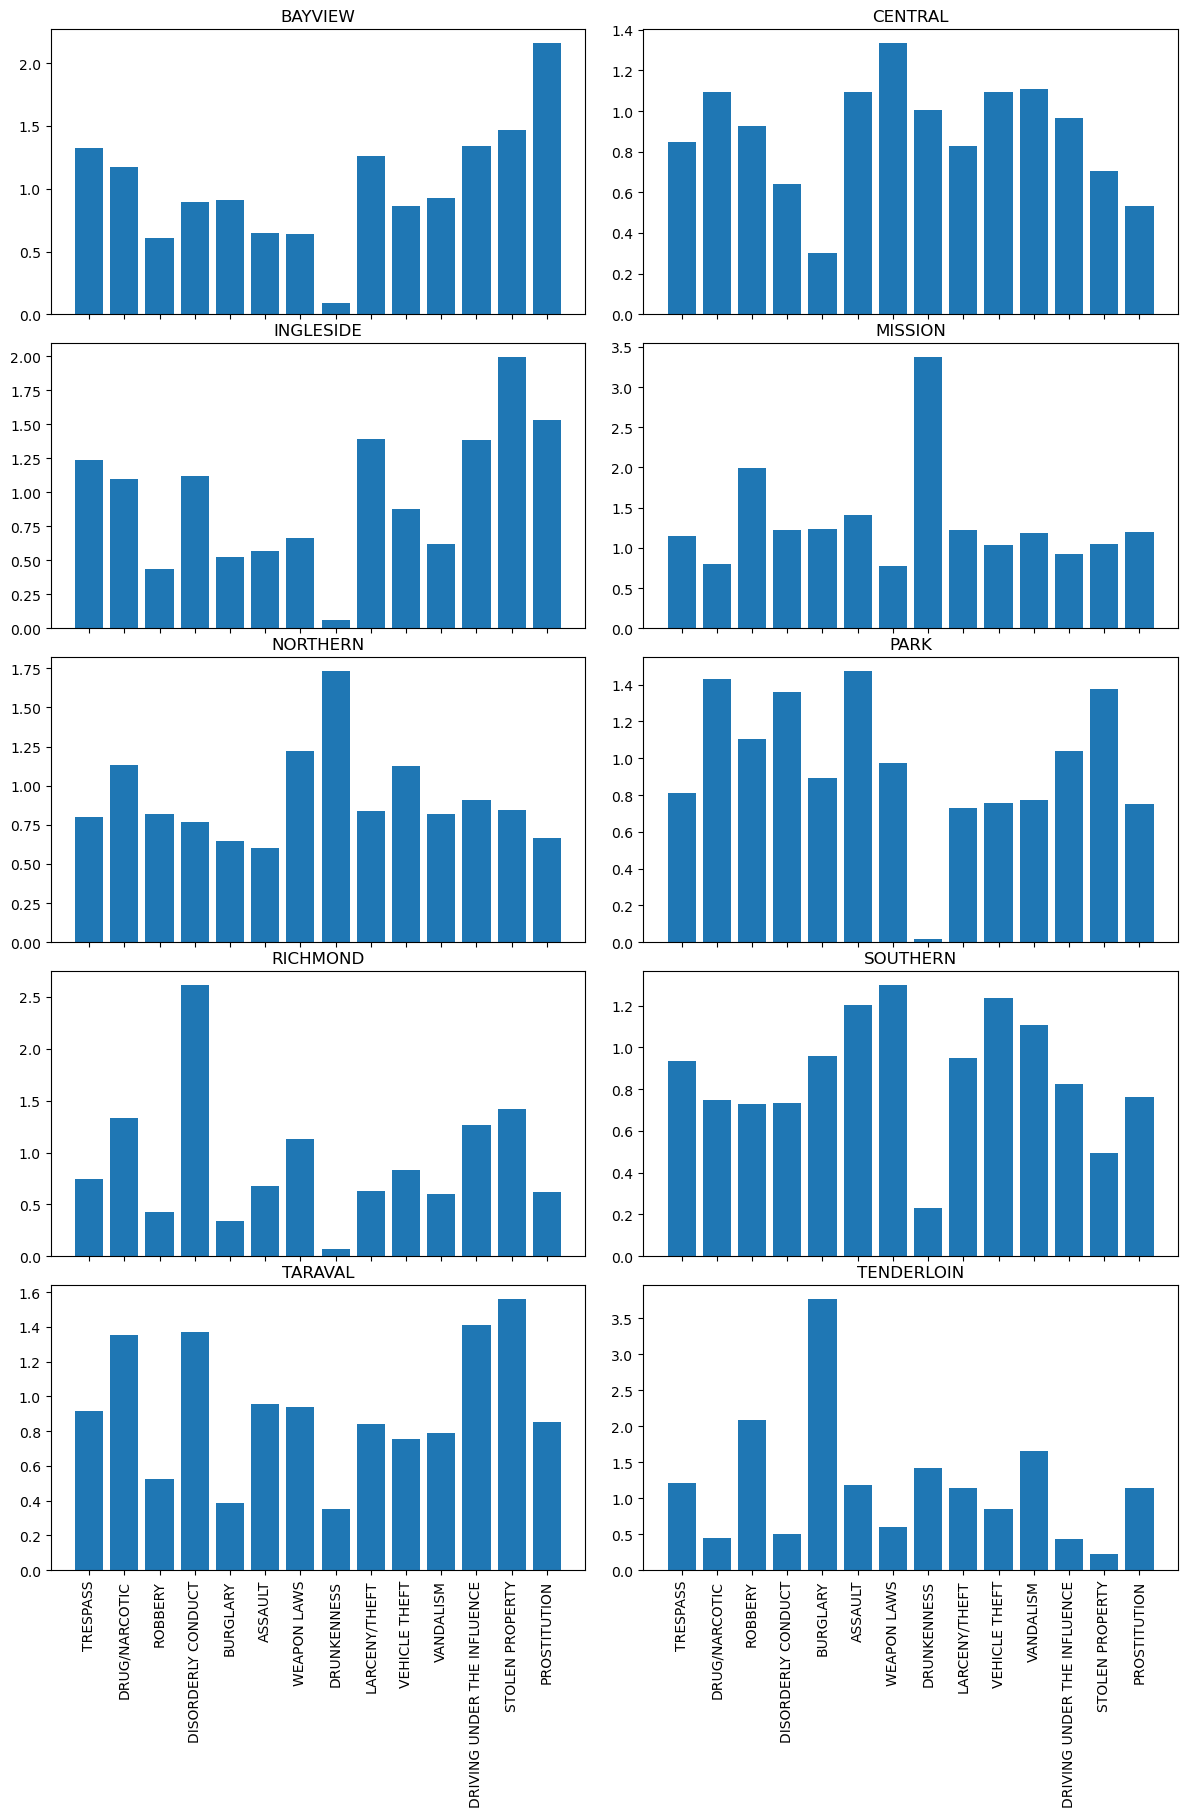

In [106]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,16)
fig, axes = plt.subplots(5,2,sharex=True)
fig.tight_layout()

x_pos = np.arange(len(focuscrimes))

for i, c in enumerate(t.PdDistrict.unique()):
    ax = axes[int(np.floor(i/2)),i%2]

    val = p_crime_pd[c].p.values/p_crime.values

    ax.bar(x_pos, val)
    ax.set_xticks(x_pos)
    ax.set_title(c)
    ax.set_xticklabels(focuscrimes, rotation=90)